In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

import random 
import datetime as dt
import re
import pickle
import nltk, warnings
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import digits, punctuation


from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings("ignore")
plt.style.use('bmh')

%matplotlib inline
import os

In [3]:
# Importing datasets

train=pd.read_csv("train_set.csv",delimiter=";")
codes=pd.read_csv("codes.csv",delimiter=";")
types=pd.read_csv("types.csv",delimiter=";")
transactions=pd.read_csv("transactions.csv",delimiter=";")

# Descriptive statistics and Explanatory data analysis

In [4]:
transactions

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87
...,...,...,...,...,...
130034,15836839,147 11:50:53,5411,1010,-26344.59
130035,28369355,305 11:59:34,4829,2330,-24705.07
130036,40949707,398 21:13:58,5411,1110,-40353.72
130037,7174462,409 13:58:14,5411,1010,-25536.06


In [5]:
train

,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0
...,...,...
5995,71577803,0
5996,8128547,1
5997,26055781,0
5998,73504380,1


In [6]:
train.shape

(6000, 2)

In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  130039 non-null  int64  
 1   datetime   130039 non-null  object 
 2   code       130039 non-null  int64  
 3   type       130039 non-null  int64  
 4   sum        130039 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.0+ MB


To display transaction info

In [8]:
data=pd.merge(transactions,train,on='client_id')

Merge the transaction and train tables into data

In [9]:
data

,client_id,datetime,code,type,sum,target
0,96372458,421 06:33:15,6011,2010,-561478.94,0
1,96372458,270 06:16:18,6011,7010,224591.58,0
2,96372458,97 10:48:35,4829,2370,-11229.58,0
3,96372458,445 07:33:38,4829,2330,-417695.42,0
4,96372458,4 09:33:46,4814,1030,-2245.92,0
...,...,...,...,...,...,...
91821,82133712,424 13:23:10,6011,2010,-17967.33,1
91822,82133712,232 09:38:10,6536,6110,179673.26,1
91823,12289409,108 11:13:33,6011,2010,-132509.03,0
91824,71829751,72 14:50:37,6011,2010,-44918.32,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91826 entries, 0 to 91825
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  91826 non-null  int64  
 1   datetime   91826 non-null  object 
 2   code       91826 non-null  int64  
 3   type       91826 non-null  int64  
 4   sum        91826 non-null  float64
 5   target     91826 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 4.9+ MB


In [11]:
len(data.code.unique())

173

To display number of unique codes

In [12]:
len(data.type.unique())

61

To display number of unique types

In [13]:
data.describe()

,client_id,code,type,sum,target
count,9.182600e+04,91826.000000,91826.000000,9.182600e+04,91826.000000
mean,5.169368e+07,5596.441389,2549.483403,-1.666997e+04,0.491266
std,2.839945e+07,602.144814,2295.581132,6.232297e+05,0.499926
min,2.289900e+04,742.000000,1010.000000,-4.150030e+07,0.000000
25%,2.736051e+07,5251.000000,1030.000000,-2.156079e+04,0.000000
50%,5.388370e+07,5661.000000,1110.000000,-5.239160e+03,0.000000
75%,7.552189e+07,6010.000000,2370.000000,-1.122960e+03,1.000000
max,9.999124e+07,9402.000000,8145.000000,6.737747e+07,1.000000


Looking for the basic statistics

In [14]:
data.nunique()

client_id     6000
datetime     81502
code           173
type            61
sum          20860
target           2
dtype: int64

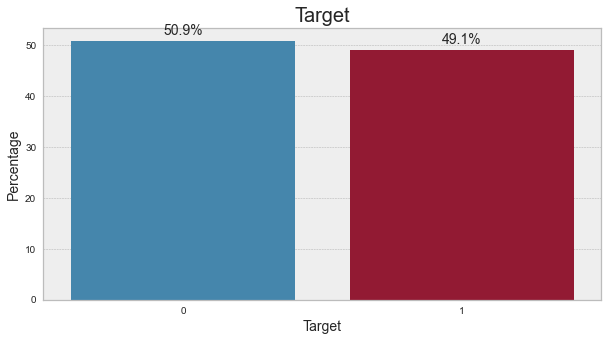

In [15]:
norm_target = (data.target.value_counts(normalize = True).mul(100).rename('percent').reset_index())
plt.figure(figsize = (10,5))
ax = sns.barplot(x = 'index', y = 'percent', data = norm_target)

for p in ax.patches: #using loop we display info about every column
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), #annotate to display info above graphs
               ha = 'center',  #centralization
               va = 'center',
               xytext = (0, 10),
               textcoords = 'offset points', #the point of offset relatively to the coordinate
               fontsize = 14)
plt.title('Target', fontsize = 20)
plt.xlabel('Target', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14);

Doing normalization to display inforation in . According to the graph above the total percentage of males and females approximately equal.

In [16]:
costs = data.groupby('code')['sum'].median()
costs

code
742      -5772.00
1711   -125052.59
1799   -186832.12
3000   -208488.36
3351    -56332.06
          ...    
8999     -4300.93
9222    -22908.34
9311    -11229.58
9399    -12273.93
9402    -71397.66
Name: sum, Length: 173, dtype: float64

In [17]:
data.loc[data['code'] == 742]

,client_id,datetime,code,type,sum,target
17016,815836,307 09:05:59,742,1110,-3368.87,1
18291,79610861,240 00:00:00,742,1110,-24400.30,0
30337,76380054,71 00:00:00,742,1110,-5772.00,0


In [18]:
a = costs.to_frame()

In [19]:
a.reset_index(level=0, inplace=True)
a

,code,sum
0,742,-5772.00
1,1711,-125052.59
2,1799,-186832.12
3,3000,-208488.36
4,3351,-56332.06
...,...,...
168,8999,-4300.93
169,9222,-22908.34
170,9311,-11229.58
171,9399,-12273.93


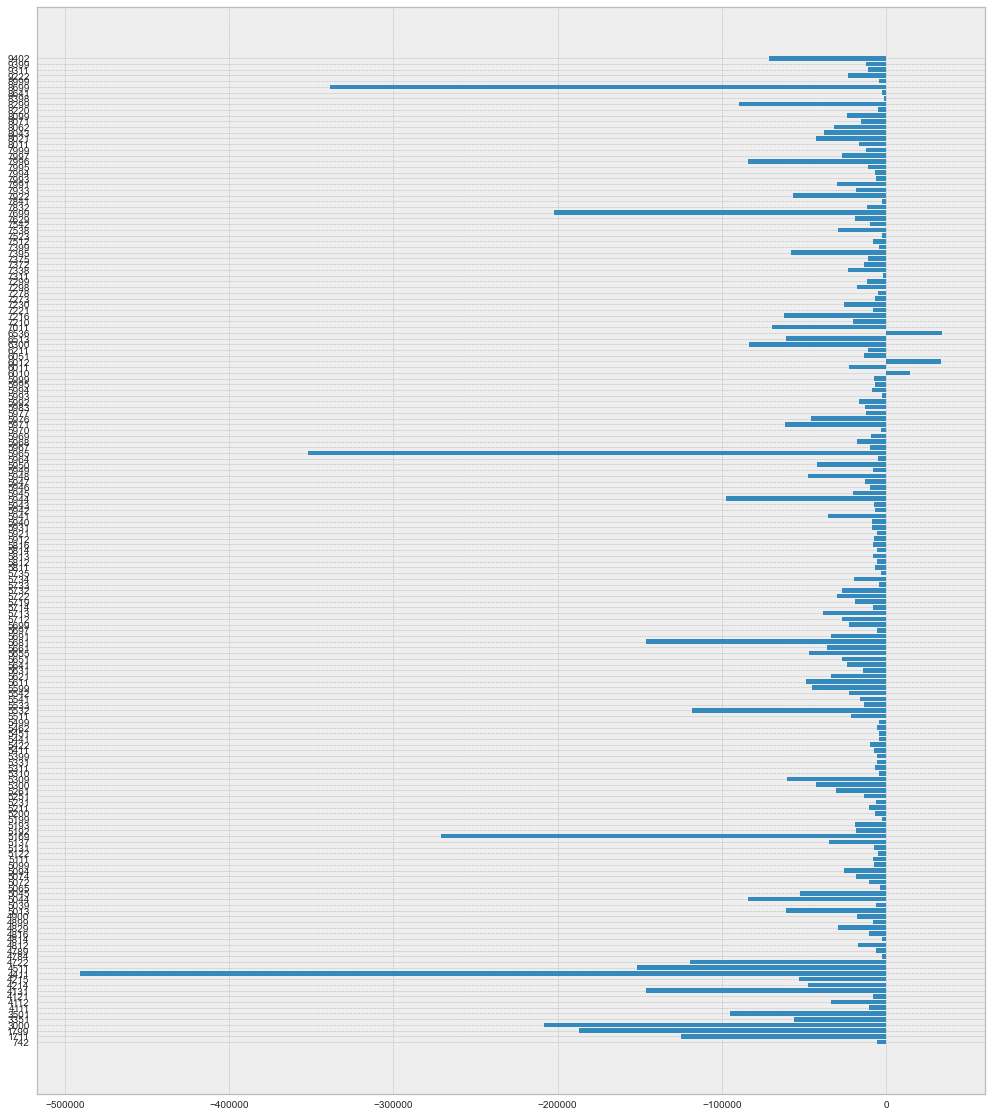

In [20]:
plt.figure(figsize = (17,20))
height = a['sum']
bars = a['code']
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.show()

In [21]:
b=a['sum'].min()
a[a['sum']==b]

,code,sum
12,4411,-490851.07


According to the gpaph above we grouped all the expenses according to the code and found the place where clients spent lots of money.

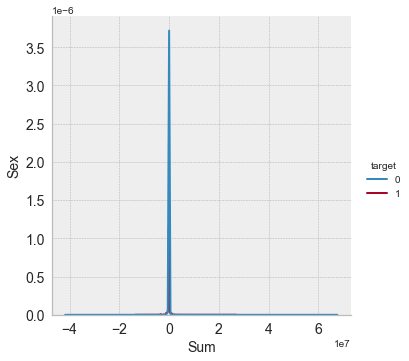

In [22]:
sns.displot(data, x = 'sum', hue = 'target', kind = 'kde', common_norm = False)
plt.xlabel('Sum', fontsize = 14)
plt.ylabel('Sex', fontsize = 14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

This is analysis of expenses relatively to the sex of the client. However the difference is unvisible, since the scatter of data is to high. This sign is not normally distributed, it is not symmetrical. It is hard to asses, that is why we will:

In [23]:
data.groupby('target')['sum'].mean()

target
0   -10784.078975
1   -22765.141157
Name: sum, dtype: float64

In [24]:
data.groupby('target')['sum'].median()

target
0   -4731.70
1   -5682.17
Name: sum, dtype: float64

And since our mean and median results are not equal, we proved that our data is not normally distributed. And males spend more money according to the mean values.

In [25]:
data['type'] = data['type'].apply(str) #convert to string to correctly visualize on graphs
data['code'] = data['code'].apply(str)

In [26]:
type_freq=data['type'].value_counts()
code_freq=data['code'].value_counts()

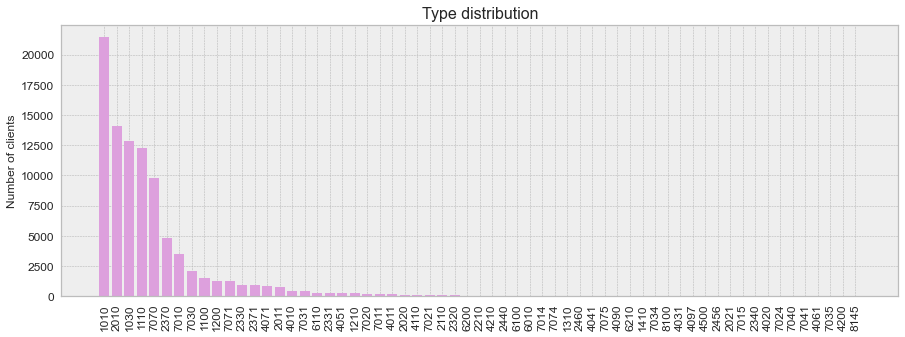

In [27]:
plt.subplots(figsize=(15,5))

plt.bar(type_freq.index,type_freq,color='plum') #bar chart for visualization
plt.title('Type distribution',size=16)
plt.ylabel("Number of clients",size=12)
plt.xticks(size = 12,rotation=90) #rotation to make xticks vertical
plt.yticks(size = 12)
plt.show()

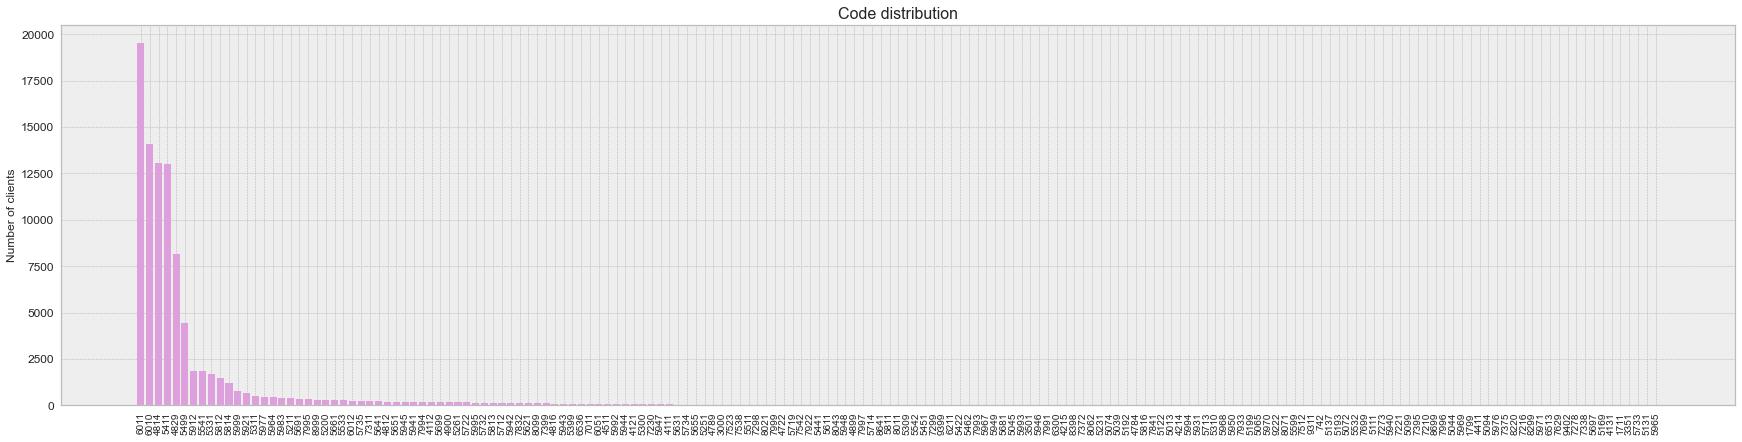

In [28]:
plt.subplots(figsize=(30,7))

plt.bar(code_freq.index,code_freq,color='plum') #bar chart for visualization
plt.title('Code distribution',size=16)
plt.ylabel("Number of clients",size=12)
plt.xticks(size = 10,rotation=90) #rotation to make xticks vertical
plt.yticks(size = 12)
plt.show()

In [29]:
data['type'] = data['type'].apply(int)
data['code'] = data['code'].apply(int)

# Feature engineering

In [30]:
day=[]
time=[]
t=[]
for i in range(len(data)):
    t=data['datetime'].iloc[i].split()
    day.append(t[0])
    time.append(t[1])

In [31]:
data['time']=time
data['day']=day

In [32]:
data[['hours','minute','seconds']]=data['time'].str.split(':',0,expand=True) #expand the split strings into separate columns
data.day=data.day.astype(int)
data.hours=data.hours.astype(int)
data.minute=data.minute.astype(int)
data.seconds=data.seconds.astype(int)
data['weekday']=(data.day+5)%7  #we suppose that 1 in dataframe is friday(1 aug 2014)
print(data.dtypes)
data.head()

client_id      int64
datetime      object
code           int64
type           int64
sum          float64
target         int64
time          object
day            int32
hours          int32
minute         int32
seconds        int32
weekday        int32
dtype: object


,client_id,datetime,code,type,sum,target,time,day,hours,minute,seconds,weekday
0,96372458,421 06:33:15,6011,2010,-561478.94,0,06:33:15,421,6,33,15,6
1,96372458,270 06:16:18,6011,7010,224591.58,0,06:16:18,270,6,16,18,2
2,96372458,97 10:48:35,4829,2370,-11229.58,0,10:48:35,97,10,48,35,4
3,96372458,445 07:33:38,4829,2330,-417695.42,0,07:33:38,445,7,33,38,2
4,96372458,4 09:33:46,4814,1030,-2245.92,0,09:33:46,4,9,33,46,2


In [33]:
data=data.drop(columns=['datetime','time','minute','seconds'])  #drop unnecessary columns

In [34]:
data.head()

,client_id,code,type,sum,target,day,hours,weekday
0,96372458,6011,2010,-561478.94,0,421,6,6
1,96372458,6011,7010,224591.58,0,270,6,2
2,96372458,4829,2370,-11229.58,0,97,10,4
3,96372458,4829,2330,-417695.42,0,445,7,2
4,96372458,4814,1030,-2245.92,0,4,9,2


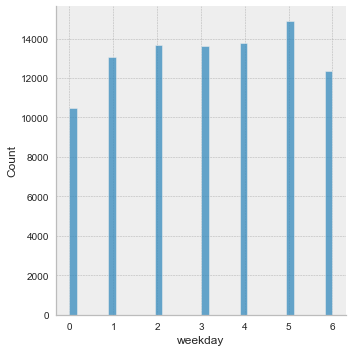

In [35]:
#The count of week days
sns.displot(data["weekday"])

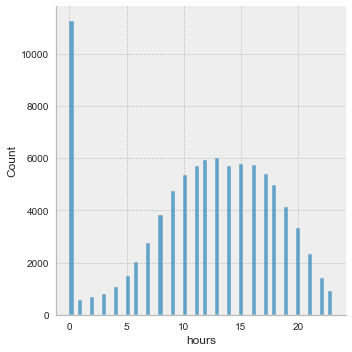

In [36]:
#The count by hours
sns.displot(data["hours"])

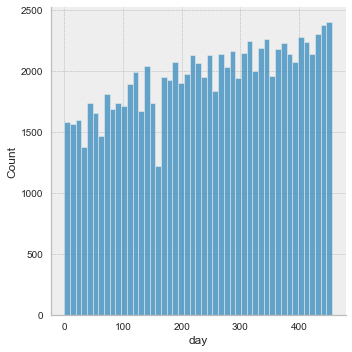

In [37]:
#Count of days
sns.displot(data["day"])

In [38]:
#separate hours 
data.loc[(data['hours']>=0) & (data['hours']<6), 'night_tr'] = 1
data.loc[(data['hours']>=6) & (data['hours']<12), 'morning_tr'] = 1
data.loc[(data['hours']>=12) & (data['hours']<18), 'afternoon_tr'] = 1
data.loc[(data['hours']>=18) & (data['hours']<=23), 'evening_tr'] = 1

data.fillna('0',inplace=True)

In [39]:
data.head()

,client_id,code,type,sum,target,day,hours,weekday,night_tr,morning_tr,afternoon_tr,evening_tr
0,96372458,6011,2010,-561478.94,0,421,6,6,0,1,0,0
1,96372458,6011,7010,224591.58,0,270,6,2,0,1,0,0
2,96372458,4829,2370,-11229.58,0,97,10,4,0,1,0,0
3,96372458,4829,2330,-417695.42,0,445,7,2,0,1,0,0
4,96372458,4814,1030,-2245.92,0,4,9,2,0,1,0,0


In [40]:
#create dataframes that contains number of transactions made by customer in certain day time
night=data.groupby('client_id')['night_tr'].value_counts().reset_index(name='night_count')
morning=data.groupby('client_id')['morning_tr'].value_counts().reset_index(name='morning_count')
afternoon=data.groupby('client_id')['afternoon_tr'].value_counts().reset_index(name='afternoon_count')
evening=data.groupby('client_id')['evening_tr'].value_counts().reset_index(name='evening_count')

night=night[night['night_tr']==1]
morning=morning[morning['morning_tr']==1]
afternoon=afternoon[afternoon['afternoon_tr']==1]
evening=evening[evening['evening_tr']==1]

In [41]:
#create dataframe with only unique client ids and number of their transactions
df = data.client_id.value_counts().rename_axis('client_id').reset_index(name='transactions')

In [42]:
df

,client_id,transactions
0,70780820,2777
1,87252636,497
2,76043922,463
3,29041434,442
4,53854864,380
...,...,...
5995,7361878,1
5996,40240853,1
5997,89757351,1
5998,98434538,1


In [43]:
#merging df with time of day dataframes by client id
df = pd.merge(df, night, on='client_id', how='outer')
df = pd.merge(df, morning, on='client_id', how='outer')
df = pd.merge(df, afternoon, on='client_id', how='outer')
df = pd.merge(df, evening, on='client_id', how='outer')

df.fillna(0,inplace=True) #fill none with 0
df=df.drop(columns=['night_tr','morning_tr','afternoon_tr','evening_tr']) #drop unnecessary columns

In [44]:
df=pd.merge(df,train,on='client_id')

In [45]:
df

,client_id,transactions,night_count,morning_count,afternoon_count,evening_count,target
0,70780820,2777,734.0,881.0,1109.0,53.0,1
1,87252636,497,33.0,158.0,190.0,116.0,1
2,76043922,463,56.0,177.0,166.0,64.0,0
3,29041434,442,107.0,158.0,164.0,13.0,1
4,53854864,380,31.0,106.0,146.0,97.0,0
...,...,...,...,...,...,...,...
5995,7361878,1,0.0,0.0,0.0,1.0,1
5996,40240853,1,0.0,1.0,0.0,0.0,0
5997,89757351,1,0.0,0.0,0.0,1.0,1
5998,98434538,1,0.0,1.0,0.0,0.0,0


In [46]:
list(types.type_description)

['Установление расх. лимита по карте',
 'Перевод с карты на счет др.лица в одном тер. банке через АТМ',
 'н/д(нет данных)',
 'Комиссия за обслуживание ссудного счета',
 'Перевод с карты на счет физ.лица в другом тер. банке через ВСП(Внутреннее Структурное Подразделение)',
 'Покупка. POS  Зарубеж.',
 'Пополнение счета на сумму причисленных процентов',
 'Операции по утраченной карте',
 'Возврат  покупки. ',
 'Покупка. Зарубеж. ',
 'Возврат покупки.POS Зарубеж. ',
 'Плата за получение наличных в АТМ. Зарубеж.',
 'Плата за обработку счета банковской карты клиента при осущ. платежной системой экстренной выдачи наличных денежных средств',
 'Платеж с карты через ВСП',
 'Перевод с карты на счет физ.лица в другом банке через приложение банка',
 'н/д',
 'н/д',
 'Списание. Счет закрыт.',
 'Оплата услуг банка по поручению автомат.',
 'н/д',
 'Взнос наличных через АТМ (в своем тер.банке)',
 'Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя)',
 'Перевод с карты на

In [47]:
df

,client_id,transactions,night_count,morning_count,afternoon_count,evening_count,target
0,70780820,2777,734.0,881.0,1109.0,53.0,1
1,87252636,497,33.0,158.0,190.0,116.0,1
2,76043922,463,56.0,177.0,166.0,64.0,0
3,29041434,442,107.0,158.0,164.0,13.0,1
4,53854864,380,31.0,106.0,146.0,97.0,0
...,...,...,...,...,...,...,...
5995,7361878,1,0.0,0.0,0.0,1.0,1
5996,40240853,1,0.0,1.0,0.0,0.0,0
5997,89757351,1,0.0,0.0,0.0,1.0,1
5998,98434538,1,0.0,1.0,0.0,0.0,0


## RFM

Recency

In [48]:
last_tr_df=data.groupby('client_id')['day'].max().reset_index(name='last_tr')
ones = []
for one in range(len(last_tr_df)):
    ones.append(457)
last_tr_df['today'] = ones


In [49]:
last_tr_df['Recency'] = last_tr_df['today'].sub(last_tr_df['last_tr'], axis = 0)
last_tr_df

,client_id,last_tr,today,Recency
0,22899,441,457,16
1,27914,292,457,165
2,28753,433,457,24
3,38084,429,457,28
4,49793,439,457,18
...,...,...,...,...
5995,99900908,311,457,146
5996,99911226,455,457,2
5997,99967537,332,457,125
5998,99985917,61,457,396


In [50]:
last_tr_df.drop(['last_tr', 'today'], axis='columns', inplace=True)
recency_df=last_tr_df
recency_df

,client_id,Recency
0,22899,16
1,27914,165
2,28753,24
3,38084,28
4,49793,18
...,...,...
5995,99900908,146
5996,99911226,2
5997,99967537,125
5998,99985917,396


## Frequency

In [51]:
frequency_df=data.groupby('client_id')['client_id'].count().reset_index(name='Frequency')
frequency_df

,client_id,Frequency
0,22899,9
1,27914,4
2,28753,13
3,38084,26
4,49793,21
...,...,...
5995,99900908,5
5996,99911226,12
5997,99967537,1
5998,99985917,1


## Monetary

In [52]:
income=data[data['sum'] <= 0]

income['sum']=income['sum'].apply(abs)
income

,client_id,code,type,sum,target,day,hours,weekday,night_tr,morning_tr,afternoon_tr,evening_tr
0,96372458,6011,2010,561478.94,0,421,6,6,0,1,0,0
2,96372458,4829,2370,11229.58,0,97,10,4,0,1,0,0
3,96372458,4829,2330,417695.42,0,445,7,2,0,1,0,0
4,96372458,4814,1030,2245.92,0,4,9,2,0,1,0,0
5,96372458,4814,1030,1122.96,0,316,23,6,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
91820,4415650,6011,2010,76361.14,1,453,15,3,0,0,1,0
91821,82133712,6011,2010,17967.33,1,424,13,2,0,0,1,0
91823,12289409,6011,2010,132509.03,0,108,11,1,0,1,0,0
91824,71829751,6011,2010,44918.32,0,72,14,0,0,0,1,0


In [53]:
monetary_df=income.groupby('client_id')['sum'].sum().reset_index(name='Monetary')
monetary_df

,client_id,Monetary
0,22899,34497.27
1,27914,4491.84
2,28753,3263575.02
3,38084,1058318.65
4,49793,1409364.96
...,...,...
5951,99900908,72052.13
5952,99911226,667589.93
5953,99967537,336887.37
5954,99985917,224591.58


## Segmentation based on RFM

In [54]:
rf_df=recency_df


In [55]:
rfm_df=recency_df

In [56]:
rfm_df=pd.merge(rfm_df,frequency_df, on='client_id')
rfm_df = pd.merge(rfm_df,monetary_df, on='client_id')

In [57]:
rfm_df

,client_id,Recency,Frequency,Monetary
0,22899,16,9,34497.27
1,27914,165,4,4491.84
2,28753,24,13,3263575.02
3,38084,28,26,1058318.65
4,49793,18,21,1409364.96
...,...,...,...,...
5951,99900908,146,5,72052.13
5952,99911226,2,12,667589.93
5953,99967537,125,1,336887.37
5954,99985917,396,1,224591.58


In [58]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df

,client_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,22899,16,9,34497.27,64.566795,42.520148,42.520148
1,27914,165,4,4491.84,8.237303,17.973472,17.973472
2,28753,24,13,3263575.02,53.196756,58.344527,58.344527
3,38084,28,26,1058318.65,48.809219,86.736064,86.736064
4,49793,18,21,1409364.96,61.254802,79.256212,79.256212
...,...,...,...,...,...,...,...
5951,99900908,146,5,72052.13,9.816475,23.270651,23.270651
5952,99911226,2,12,667589.93,96.423389,54.885829,54.885829
5953,99967537,125,1,336887.37,12.112676,2.400940,2.400940
5954,99985917,396,1,224591.58,0.580452,2.400940,2.400940


In [59]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['client_id', 'RFM_Score']]

,client_id,RFM_Score
0,22899,2.29
1,27914,0.83
2,28753,2.88
3,38084,4.05
4,49793,3.83
...,...,...
5951,99900908,1.06
5952,99911226,3.06
5953,99967537,0.19
5954,99985917,0.11


In [60]:
rfm_new=rfm_df.drop(['R_rank_norm', 'F_rank_norm', 'M_rank_norm'], axis=1)
rfm_new

,client_id,Recency,Frequency,Monetary,RFM_Score
0,22899,16,9,34497.27,2.29
1,27914,165,4,4491.84,0.83
2,28753,24,13,3263575.02,2.88
3,38084,28,26,1058318.65,4.05
4,49793,18,21,1409364.96,3.83
...,...,...,...,...,...
5951,99900908,146,5,72052.13,1.06
5952,99911226,2,12,667589.93,3.06
5953,99967537,125,1,336887.37,0.19
5954,99985917,396,1,224591.58,0.11


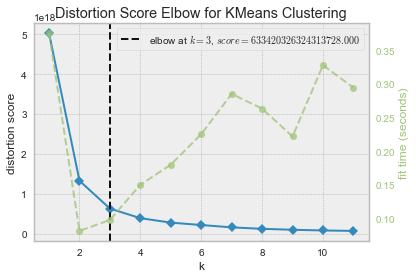

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(rfm_new)  
visualizer.show()  

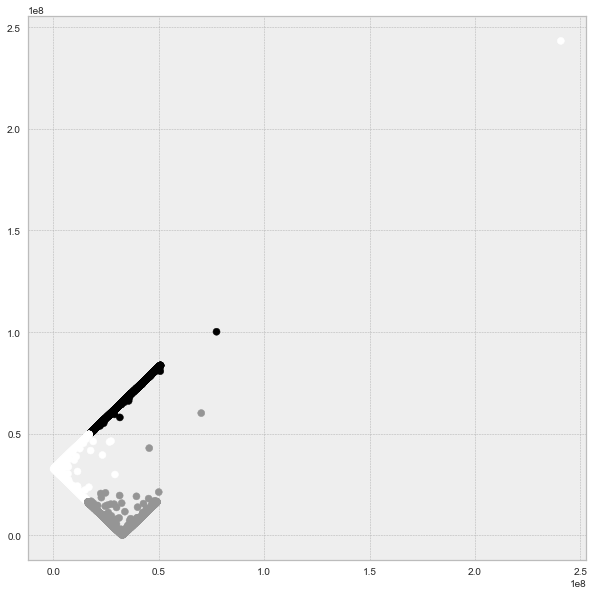

In [62]:
n_clusters = 3
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60",'#000000']
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
proj = kmeans.fit_transform(rfm_new)
cluster = kmeans.predict(rfm_new)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=cluster)


In [63]:
cluster

array([2, 2, 2, ..., 1, 1, 1])

<AxesSubplot:>

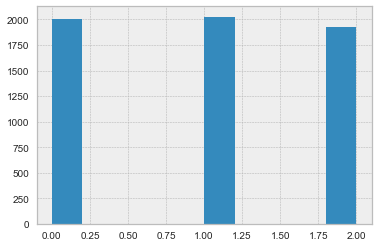

In [64]:
pd.Series(cluster).hist(bins=10)

In [65]:
df2 = pd.get_dummies(cluster, prefix="Cluster_RFM")

In [66]:
rfm_new=rfm_new.join(df2)

In [67]:
rfm_new
#=rfm_new.drop(['Recency','transactions'], axis=1)

,client_id,Recency,Frequency,Monetary,RFM_Score,Cluster_RFM_0,Cluster_RFM_1,Cluster_RFM_2
0,22899,16,9,34497.27,2.29,0,0,1
1,27914,165,4,4491.84,0.83,0,0,1
2,28753,24,13,3263575.02,2.88,0,0,1
3,38084,28,26,1058318.65,4.05,0,0,1
4,49793,18,21,1409364.96,3.83,0,0,1
...,...,...,...,...,...,...,...,...
5951,99900908,146,5,72052.13,1.06,0,1,0
5952,99911226,2,12,667589.93,3.06,0,1,0
5953,99967537,125,1,336887.37,0.19,0,1,0
5954,99985917,396,1,224591.58,0.11,0,1,0


In [68]:
df

,client_id,transactions,night_count,morning_count,afternoon_count,evening_count,target
0,70780820,2777,734.0,881.0,1109.0,53.0,1
1,87252636,497,33.0,158.0,190.0,116.0,1
2,76043922,463,56.0,177.0,166.0,64.0,0
3,29041434,442,107.0,158.0,164.0,13.0,1
4,53854864,380,31.0,106.0,146.0,97.0,0
...,...,...,...,...,...,...,...
5995,7361878,1,0.0,0.0,0.0,1.0,1
5996,40240853,1,0.0,1.0,0.0,0.0,0
5997,89757351,1,0.0,0.0,0.0,1.0,1
5998,98434538,1,0.0,1.0,0.0,0.0,0


# Clustering for codes

In [69]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dimash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
codes=pd.read_csv("codes.csv",delimiter=";")

In [71]:
our_stop_words=['нигде','классифицированные','более','классифицируемые','классифицированное', 'ранее',' общий','другие','недлительного','непередаваемые','включая']

In [72]:
#Loading Stopwords into a list
NLTK_stop_words=stopwords.words('russian')

In [73]:
#All stop words
final_stopword_list = our_stop_words + NLTK_stop_words

In [74]:
list(codes[codes.code_description.str.contains('классиф')].code_description)

['Товары недлительного пользования, не классифицированные ранее',
 'Прямой маркетинг — другие торговые точки прямого маркетинга (нигде более не классифицированные)',
 'Услуги по транспортировке — нигде более не классифицированные',
 'Промышленное оборудование — нигде более не классифицированное',
 'Организации, членства, нигде ранее не классифицируемые',
 'Доктора, нигде ранее не классифицируемые',
 'Авиалинии, авиакомпании, нигде более не классифицированные',
 'Товары длительного пользования — нигде более не классифицированные',
 'Подрядчики, специализированная торговля — нигде более не классифицированные',
 'Правительственные услуги, нигде ранее не классифицируемые',
 'Услуги отдыха, нигде ранее не классифицируемые',
 'Химикалии и смежные вещества, не классифицированные ранее',
 'Практикующие врачи, медицинские услуги, нигде ранее не классифицируемые',
 'Строительные материалы — нигде более не классифицированные',
 'Профессиональные услуги, нигде ранее не классифицируемые']

In [75]:
import re

from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords

patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()

def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in final_stopword_list:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    if len(tokens) > 0:
        return tokens
    return None

In [76]:
codes['code_description'] = codes['code_description'].apply(lemmatize)


In [77]:
codes['code_description']

0      [магазин, продажа, час, ювелирный, изделие, из...
1                           [готовый, сумочный, изделие]
2            [услуга, переделка, починка, пошив, одежда]
3                           [транзакция, азартный, игра]
4              [мужской, женский, детский, спец, одежда]
                             ...                        
179    [офисный, фотографический, фотокопировальный, ...
180    [горючий, топливо, уголь, нефть, разжидить, бе...
181                [дилер, продажа, печатный, продукция]
182              [книга, периодический, издание, газета]
183               [театральный, продюсерский, агентство]
Name: code_description, Length: 184, dtype: object

In [78]:
from collections import defaultdict

word_freq = defaultdict(int)
for tokens in codes['code_description'].iloc[:]:
    for token in tokens:
        word_freq[token] += 1

In [79]:
word_freq=dict(word_freq)

In [80]:
dict(sorted(word_freq.items(), key=lambda item: item[1],reverse=True)[:40])

{'магазин': 27,
 'продажа': 20,
 'услуга': 16,
 'товар': 12,
 'оборудование': 12,
 'одежда': 11,
 'изделие': 8,
 'прямой': 6,
 'маркетинг': 6,
 'принадлежность': 6,
 'агентство': 5,
 'сервис': 5,
 'клуб': 5,
 'материал': 4,
 'финансовый': 4,
 'институт': 4,
 'розница': 4,
 'бытовой': 4,
 'ремонт': 4,
 'различный': 4,
 'аксессуар': 4,
 'мужской': 3,
 'детский': 3,
 'торговля': 3,
 'обеспечение': 3,
 'денежный': 3,
 'перевод': 3,
 'дорожный': 3,
 'общий': 3,
 'торговый': 3,
 'отдых': 3,
 'офисный': 3,
 'компьютерный': 3,
 'медицинский': 3,
 'подрядчик': 3,
 'ювелирный': 2,
 'игра': 2,
 'женский': 2,
 'спец': 2,
 'каталог': 2}

In [81]:
for i in range(len(codes)):
    codes['code_description'].iloc[i]=' '.join(map(str,codes['code_description'].iloc[i])) 
codes  
    

,code,code_description
0,5944,магазин продажа час ювелирный изделие изделие ...
1,5621,готовый сумочный изделие
2,5697,услуга переделка починка пошив одежда
3,7995,транзакция азартный игра
4,5137,мужской женский детский спец одежда
...,...,...
179,5044,офисный фотографический фотокопировальный микр...
180,5983,горючий топливо уголь нефть разжидить бензин д...
181,5994,дилер продажа печатный продукция
182,5192,книга периодический издание газета


In [82]:
X = codes['code_description'].unique()

analyzer = TfidfVectorizer().build_analyzer()
CV = TfidfVectorizer(lowercase=True, stop_words="russian", analyzer=lemmatize, min_df=0.00, max_df=0.3)  # we remove words if it appears in more than 30 % of the corpus (not found stopwords like Box, Christmas and so on)
TF_IDF_matrix = CV.fit_transform(X)
print("TF_IDF_matrix :", TF_IDF_matrix.shape, "of", TF_IDF_matrix.dtype)

TF_IDF_matrix : (182, 420) of float64


In [83]:
TF_IDF_matrix

<182x420 sparse matrix of type '<class 'numpy.float64'>'
	with 641 stored elements in Compressed Sparse Row format>

In [84]:
svd = TruncatedSVD(n_components = 156)
normalizer = Normalizer(copy=False)

TF_IDF_embedded = svd.fit_transform(TF_IDF_matrix)
TF_IDF_embedded = normalizer.fit_transform(TF_IDF_embedded)
print("TF_IDF_embedded :", TF_IDF_embedded.shape, "of", TF_IDF_embedded.dtype)

TF_IDF_embedded : (182, 156) of float64


In [85]:
var_explained = svd.explained_variance_ratio_.sum()
var_explained


0.9517177154880285

In [86]:
score_tfidf = []

x = list(range(2, 25, 1))

for n_clusters in x:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(TF_IDF_embedded)
    clusters = kmeans.predict(TF_IDF_embedded)
    silhouette_avg = silhouette_score(TF_IDF_embedded, clusters)
    print("N clusters =", n_clusters, "Silhouette Score :", silhouette_avg)
    rep = np.histogram(clusters, bins = n_clusters-1)[0]
    score_tfidf.append(silhouette_avg)

    

N clusters = 2 Silhouette Score : 0.010963558429994373
N clusters = 3 Silhouette Score : 0.014575962917697485
N clusters = 4 Silhouette Score : 0.02192720914841891
N clusters = 5 Silhouette Score : 0.026059558531453083
N clusters = 6 Silhouette Score : 0.028939753607280874
N clusters = 7 Silhouette Score : 0.02994922230045691
N clusters = 8 Silhouette Score : 0.03387121337130213
N clusters = 9 Silhouette Score : 0.03844136331900468
N clusters = 10 Silhouette Score : 0.04212780341925185
N clusters = 11 Silhouette Score : 0.03819832123544628
N clusters = 12 Silhouette Score : 0.037798966425118485
N clusters = 13 Silhouette Score : 0.04385462234411134
N clusters = 14 Silhouette Score : 0.04367468756503069
N clusters = 15 Silhouette Score : 0.040351996226281064
N clusters = 16 Silhouette Score : 0.04844995480280049
N clusters = 17 Silhouette Score : 0.06084165200533841
N clusters = 18 Silhouette Score : 0.054863236542391336
N clusters = 19 Silhouette Score : 0.05825769432601787
N clusters 

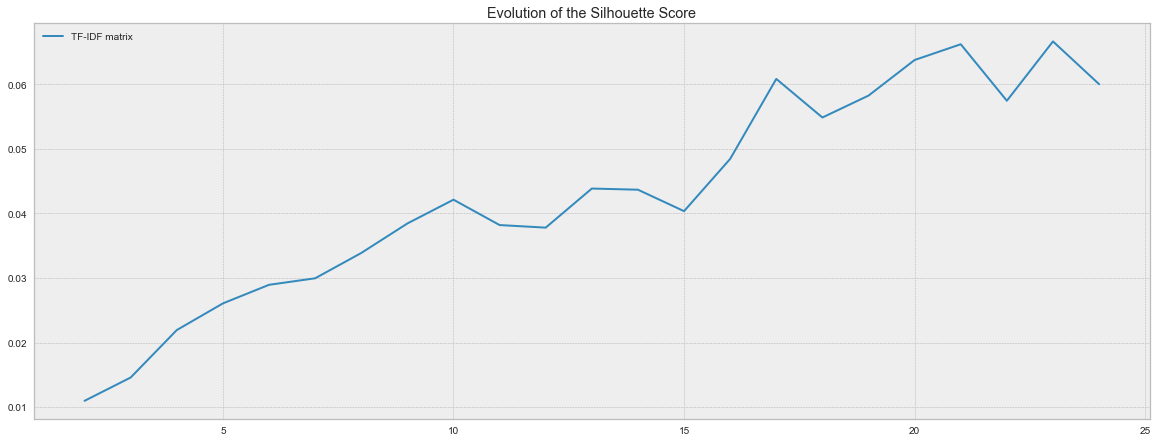

In [87]:
plt.figure(figsize=(20,16))

plt.subplot(2, 1, 1)
plt.plot(x, score_tfidf, label="TF-IDF matrix")
plt.title("Evolution of the Silhouette Score")
plt.legend()

In [88]:
codes

,code,code_description
0,5944,магазин продажа час ювелирный изделие изделие ...
1,5621,готовый сумочный изделие
2,5697,услуга переделка починка пошив одежда
3,7995,транзакция азартный игра
4,5137,мужской женский детский спец одежда
...,...,...
179,5044,офисный фотографический фотокопировальный микр...
180,5983,горючий топливо уголь нефть разжидить бензин д...
181,5994,дилер продажа печатный продукция
182,5192,книга периодический издание газета


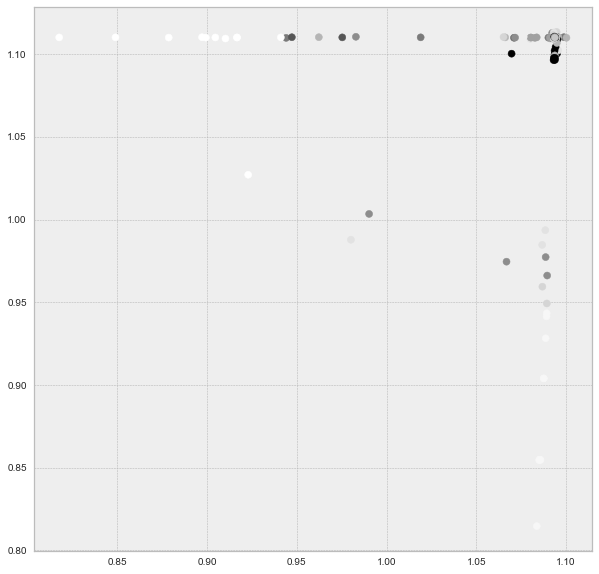

In [89]:
n_clusters = 16

kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
proj = kmeans.fit_transform(TF_IDF_embedded)
clusters = kmeans.predict(TF_IDF_embedded)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)


Text(0.5, 1.0, 'Visualization of the clustering with TSNE')

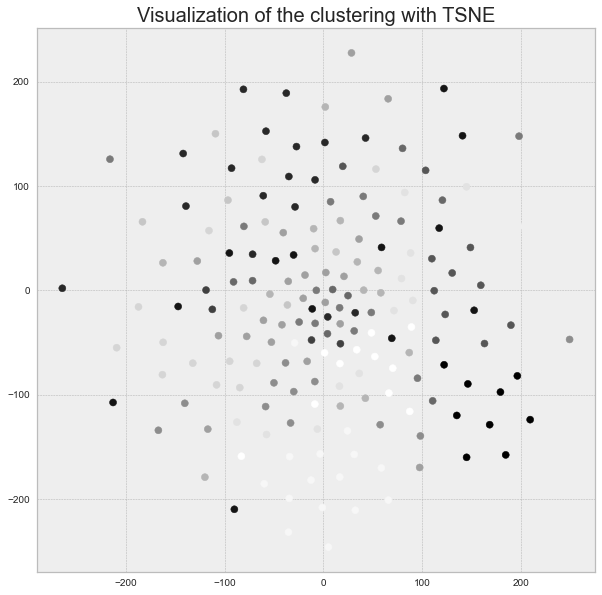

In [90]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(TF_IDF_embedded)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="20")

<Figure size 432x288 with 0 Axes>

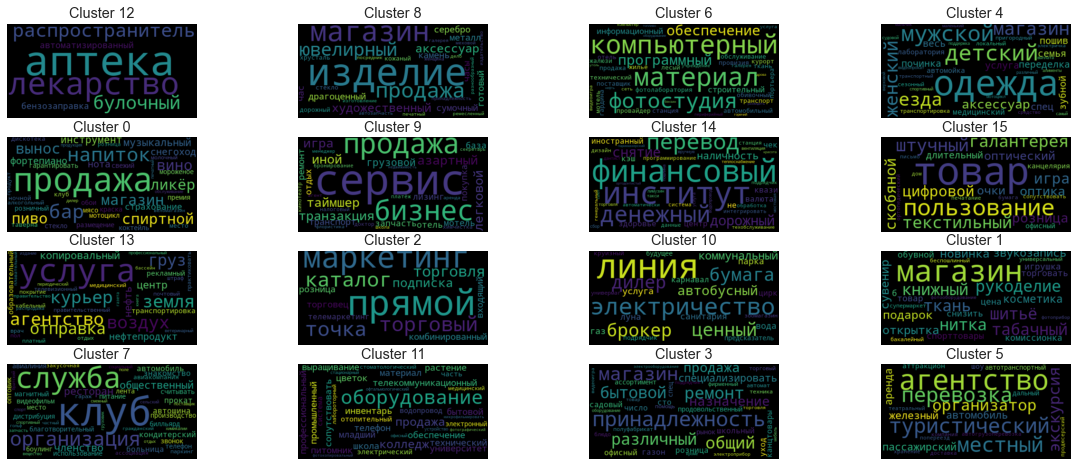

<Figure size 432x288 with 0 Axes>

In [91]:
plt.figure(figsize=(20,8))
wc = WordCloud()

for num, cluster in enumerate(random.sample(range(16), 16)) :
    plt.subplot(4,4 , num+1)
    wc.generate(" ".join(X[np.where(clusters==cluster)]))
    plt.imshow(wc, interpolation='bilinear')
    plt.title("Cluster {}".format(cluster))
    plt.axis("off")
plt.figure()

In [92]:
clusters

array([ 8,  8,  4,  9,  4,  2,  9,  1, 15, 11,  0, 14, 11,  7,  1, 13, 12,
        1,  6,  0, 15,  3,  1, 11,  7,  7,  8,  9,  0, 14,  3,  7,  2,  9,
        0, 13, 14,  9,  7,  8,  6,  7, 10,  7,  4, 11,  2, 12,  1, 15, 14,
        9, 12, 13,  6,  3,  7, 13, 10,  3, 11,  7,  5,  6, 13,  4,  9,  8,
       13, 14,  7,  9,  1, 11,  7,  5,  9,  7,  3,  2, 10,  8,  6,  8, 14,
        9,  7, 15,  3, 10,  3,  4,  1, 15,  7, 11,  5,  0, 14,  6, 11,  7,
       15, 10, 15,  9,  3,  9, 13, 13,  7, 10,  4,  8,  6,  8,  7,  0,  2,
        1,  7, 14, 13,  7,  0,  4,  1,  4, 13,  5, 13, 10,  3,  4,  4,  9,
       10,  6, 14,  0,  3,  1,  7,  4, 14,  6,  0,  1, 13,  4, 14,  1,  8,
       11, 15, 12,  1,  0,  3,  6,  6, 13, 14,  5,  9,  1, 13, 13,  1, 15,
        6, 14, 11,  6,  4, 13,  8, 11,  6,  0, 13,  5])

<AxesSubplot:>

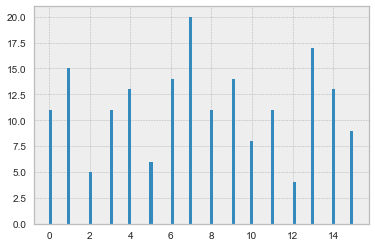

In [93]:
pd.Series(clusters).hist(bins=100)

In [94]:
dict_article_to_cluster = {article : cluster for article, cluster in zip(X, clusters)}

In [95]:
with open('product_clusters.pickle', 'wb') as h:
    pickle.dump(dict_article_to_cluster, h)

In [96]:
cluster = codes['code_description'].apply(lambda x : dict_article_to_cluster[x])
df2 = pd.get_dummies(cluster, prefix="Cluster_codes")

In [97]:
cluster

0       8
1       8
2       4
3       9
4       4
       ..
179    11
180     6
181     0
182    13
183     5
Name: code_description, Length: 184, dtype: int64

In [98]:
codes=codes.join(df2)

In [99]:
codes.head()

,code,code_description,Cluster_codes_0,Cluster_codes_1,Cluster_codes_2,Cluster_codes_3,Cluster_codes_4,Cluster_codes_5,Cluster_codes_6,Cluster_codes_7,Cluster_codes_8,Cluster_codes_9,Cluster_codes_10,Cluster_codes_11,Cluster_codes_12,Cluster_codes_13,Cluster_codes_14,Cluster_codes_15
0,5944,магазин продажа час ювелирный изделие изделие ...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5621,готовый сумочный изделие,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,5697,услуга переделка починка пошив одежда,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,7995,транзакция азартный игра,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5137,мужской женский детский спец одежда,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [100]:
data=pd.merge(data,codes,on='code')

In [101]:
data

,client_id,code,type,sum,target,day,hours,weekday,night_tr,morning_tr,...,Cluster_codes_6,Cluster_codes_7,Cluster_codes_8,Cluster_codes_9,Cluster_codes_10,Cluster_codes_11,Cluster_codes_12,Cluster_codes_13,Cluster_codes_14,Cluster_codes_15
0,96372458,6011,2010,-561478.94,0,421,6,6,0,1,...,0,0,0,0,0,0,0,0,1,0
1,96372458,6011,7010,224591.58,0,270,6,2,0,1,...,0,0,0,0,0,0,0,0,1,0
2,96372458,6011,2010,-426724.00,0,68,2,3,1,0,...,0,0,0,0,0,0,0,0,1,0
3,96372458,6011,2010,-112295.79,0,433,6,4,0,1,...,0,0,0,0,0,0,0,0,1,0
4,21717441,6011,2010,-44918.32,0,55,13,4,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91821,75555017,1711,1110,-125052.59,1,421,0,6,1,0,...,0,0,0,0,0,0,0,0,1,0
91822,31009144,4411,1210,-904166.84,0,81,17,2,0,0,...,0,0,0,0,1,0,0,0,0,0
91823,63953233,4411,1210,-77535.30,0,15,0,6,1,0,...,0,0,0,0,1,0,0,0,0,0
91824,516081,5697,1110,-5614.79,0,442,0,6,1,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
df

,client_id,transactions,night_count,morning_count,afternoon_count,evening_count,target
0,70780820,2777,734.0,881.0,1109.0,53.0,1
1,87252636,497,33.0,158.0,190.0,116.0,1
2,76043922,463,56.0,177.0,166.0,64.0,0
3,29041434,442,107.0,158.0,164.0,13.0,1
4,53854864,380,31.0,106.0,146.0,97.0,0
...,...,...,...,...,...,...,...
5995,7361878,1,0.0,0.0,0.0,1.0,1
5996,40240853,1,0.0,1.0,0.0,0.0,0
5997,89757351,1,0.0,0.0,0.0,1.0,1
5998,98434538,1,0.0,1.0,0.0,0.0,0


In [103]:
df = pd.merge(df,rfm_new, on='client_id')


In [104]:
for t in range(16):
    df=pd.merge(df,data.groupby("client_id")['Cluster_codes_'+str(t)].sum(),on='client_id')

In [105]:
df

,client_id,transactions,night_count,morning_count,afternoon_count,evening_count,target,Recency,Frequency,Monetary,...,Cluster_codes_6,Cluster_codes_7,Cluster_codes_8,Cluster_codes_9,Cluster_codes_10,Cluster_codes_11,Cluster_codes_12,Cluster_codes_13,Cluster_codes_14,Cluster_codes_15
0,70780820,2777,734.0,881.0,1109.0,53.0,1,1,2777,41684196.72,...,0,0,0,0,0,0,0,0,2777.0,0
1,87252636,497,33.0,158.0,190.0,116.0,1,6,497,60767294.81,...,0,0,0,0,0,1,0,0,496.0,0
2,76043922,463,56.0,177.0,166.0,64.0,0,2,463,4353088.76,...,0,2,0,0,0,0,0,0,461.0,0
3,29041434,442,107.0,158.0,164.0,13.0,1,1,442,6150850.22,...,0,0,0,0,0,0,0,0,442.0,0
4,53854864,380,31.0,106.0,146.0,97.0,0,3,380,3097812.56,...,0,2,0,0,0,1,1,2,363.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5951,27046864,1,0.0,0.0,0.0,1.0,1,163,1,172935.51,...,0,0,0,0,0,0,0,0,1.0,0
5952,39357161,1,0.0,1.0,0.0,0.0,1,196,1,685004.31,...,0,0,0,0,0,0,0,0,1.0,0
5953,7361878,1,0.0,0.0,0.0,1.0,1,74,1,31442.82,...,0,0,0,0,0,0,0,0,1.0,0
5954,89757351,1,0.0,0.0,0.0,1.0,1,208,1,2245.92,...,0,0,0,0,0,0,0,0,1.0,0


In [106]:
df=df.drop(['transactions'], axis=1)

# DATA PREPROCESSING

In [107]:
#Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [108]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds

Dataframe to be used for further modelling:


,client_id,night_count,morning_count,afternoon_count,evening_count,target,Recency,Frequency,Monetary,RFM_Score,...,Cluster_codes_6,Cluster_codes_7,Cluster_codes_8,Cluster_codes_9,Cluster_codes_10,Cluster_codes_11,Cluster_codes_12,Cluster_codes_13,Cluster_codes_14,Cluster_codes_15
0,0.686130,69.226220,65.649256,66.811579,8.283671,1.119979,-0.724803,66.083178,10.978034,1.837987,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,68.168865,-0.198751
1,1.257862,2.871807,11.522428,11.155677,18.692539,1.119979,-0.656497,11.524194,16.096700,1.749525,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,2.379844,-0.309644,-0.322506,12.025798,-0.198751
2,0.868811,5.048913,12.944848,9.702204,10.101092,-0.892874,-0.711141,10.710595,0.964698,1.815872,...,-0.271096,-0.214112,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,11.164331,-0.198751
3,-0.762632,9.876410,11.522428,9.581082,1.674865,1.119979,-0.724803,10.208078,1.446912,1.837987,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,10.696677,-0.198751
4,0.098635,2.682493,7.629488,8.490977,15.553357,-0.892874,-0.697480,8.724456,0.627995,1.793756,...,-0.271096,-0.214112,-0.257846,-0.115256,-0.257901,2.379844,0.660498,2.121320,8.752222,-0.198751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5951,-0.831863,-0.251867,-0.306119,-0.350983,-0.307777,1.119979,1.488318,-0.344778,-0.156546,-1.722605,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,-0.157813,-0.198751
5952,-0.404576,-0.251867,-0.231255,-0.350983,-0.472997,1.119979,1.939139,-0.344778,-0.019194,-1.737349,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,-0.157813,-0.198751
5953,-1.515123,-0.251867,-0.306119,-0.350983,-0.307777,1.119979,0.272468,-0.344778,-0.194499,-1.648887,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,-0.157813,-0.198751
5954,1.344800,-0.251867,-0.306119,-0.350983,-0.307777,1.119979,2.103074,-0.344778,-0.202330,-1.744721,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,-0.157813,-0.198751


In [109]:
scaled_ds=scaled_ds.drop(['client_id'], axis=1)


In [110]:
scaled_ds

,night_count,morning_count,afternoon_count,evening_count,target,Recency,Frequency,Monetary,RFM_Score,Cluster_RFM_0,...,Cluster_codes_6,Cluster_codes_7,Cluster_codes_8,Cluster_codes_9,Cluster_codes_10,Cluster_codes_11,Cluster_codes_12,Cluster_codes_13,Cluster_codes_14,Cluster_codes_15
0,69.226220,65.649256,66.811579,8.283671,1.119979,-0.724803,66.083178,10.978034,1.837987,-0.711028,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,68.168865,-0.198751
1,2.871807,11.522428,11.155677,18.692539,1.119979,-0.656497,11.524194,16.096700,1.749525,-0.711028,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,2.379844,-0.309644,-0.322506,12.025798,-0.198751
2,5.048913,12.944848,9.702204,10.101092,-0.892874,-0.711141,10.710595,0.964698,1.815872,-0.711028,...,-0.271096,-0.214112,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,11.164331,-0.198751
3,9.876410,11.522428,9.581082,1.674865,1.119979,-0.724803,10.208078,1.446912,1.837987,-0.711028,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,10.696677,-0.198751
4,2.682493,7.629488,8.490977,15.553357,-0.892874,-0.697480,8.724456,0.627995,1.793756,1.406414,...,-0.271096,-0.214112,-0.257846,-0.115256,-0.257901,2.379844,0.660498,2.121320,8.752222,-0.198751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5951,-0.251867,-0.306119,-0.350983,-0.307777,1.119979,1.488318,-0.344778,-0.156546,-1.722605,-0.711028,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,-0.157813,-0.198751
5952,-0.251867,-0.231255,-0.350983,-0.472997,1.119979,1.939139,-0.344778,-0.019194,-1.737349,1.406414,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,-0.157813,-0.198751
5953,-0.251867,-0.306119,-0.350983,-0.307777,1.119979,0.272468,-0.344778,-0.194499,-1.648887,-0.711028,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,-0.157813,-0.198751
5954,-0.251867,-0.306119,-0.350983,-0.307777,1.119979,2.103074,-0.344778,-0.202330,-1.744721,-0.711028,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,-0.157813,-0.198751


In [111]:
scaled_ds=scaled_ds.drop(['night_count', 'morning_count','afternoon_count','evening_count','Recency','Frequency'], axis=1)


In [112]:
scaled_ds

,target,Monetary,RFM_Score,Cluster_RFM_0,Cluster_RFM_1,Cluster_RFM_2,Cluster_codes_0,Cluster_codes_1,Cluster_codes_2,Cluster_codes_3,...,Cluster_codes_6,Cluster_codes_7,Cluster_codes_8,Cluster_codes_9,Cluster_codes_10,Cluster_codes_11,Cluster_codes_12,Cluster_codes_13,Cluster_codes_14,Cluster_codes_15
0,1.119979,10.978034,1.837987,-0.711028,1.392240,-0.692110,-0.229071,-0.719527,-0.121351,-0.435141,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,68.168865,-0.198751
1,1.119979,16.096700,1.749525,-0.711028,1.392240,-0.692110,-0.229071,-0.719527,-0.121351,-0.435141,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,2.379844,-0.309644,-0.322506,12.025798,-0.198751
2,-0.892874,0.964698,1.815872,-0.711028,1.392240,-0.692110,-0.229071,-0.719527,-0.121351,-0.435141,...,-0.271096,-0.214112,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,11.164331,-0.198751
3,1.119979,1.446912,1.837987,-0.711028,-0.718267,1.444856,-0.229071,-0.719527,-0.121351,-0.435141,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,10.696677,-0.198751
4,-0.892874,0.627995,1.793756,1.406414,-0.718267,-0.692110,-0.229071,1.388183,-0.121351,0.082888,...,-0.271096,-0.214112,-0.257846,-0.115256,-0.257901,2.379844,0.660498,2.121320,8.752222,-0.198751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5951,1.119979,-0.156546,-1.722605,-0.711028,-0.718267,1.444856,-0.229071,-0.719527,-0.121351,-0.435141,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,-0.157813,-0.198751
5952,1.119979,-0.019194,-1.737349,1.406414,-0.718267,-0.692110,-0.229071,-0.719527,-0.121351,-0.435141,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,-0.157813,-0.198751
5953,1.119979,-0.194499,-1.648887,-0.711028,-0.718267,1.444856,-0.229071,-0.719527,-0.121351,-0.435141,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,-0.157813,-0.198751
5954,1.119979,-0.202330,-1.744721,-0.711028,1.392240,-0.692110,-0.229071,-0.719527,-0.121351,-0.435141,...,-0.271096,-0.837252,-0.257846,-0.115256,-0.257901,-0.225735,-0.309644,-0.322506,-0.157813,-0.198751


# DIMENSIONALITY REDUCTION

In [113]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,5956.0,1.014337e-15,1.727667,-2.225052,-1.316848,-0.355939,0.868431,18.871862
col2,5956.0,2.733430e-16,1.230370,-2.203344,-1.194693,-0.427205,1.614715,6.505434
col3,5956.0,-9.886875e-17,1.220053,-2.536051,-1.648864,0.437339,1.127320,5.157277


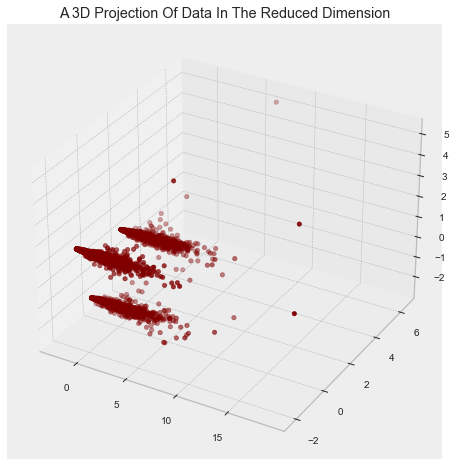

In [114]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# CLUSTERING

Elbow Method to determine the number of clusters to be formed:


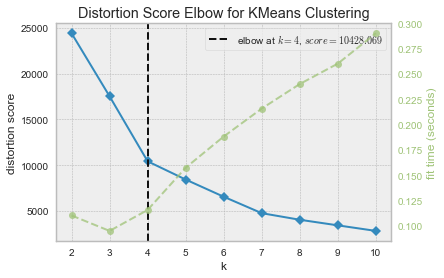

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [115]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [116]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

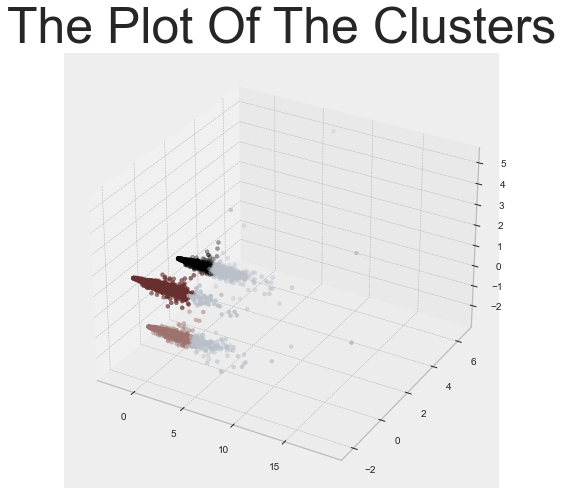

In [117]:
#Plotting the clusters
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#000000"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=15, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters", size=50)
plt.show()

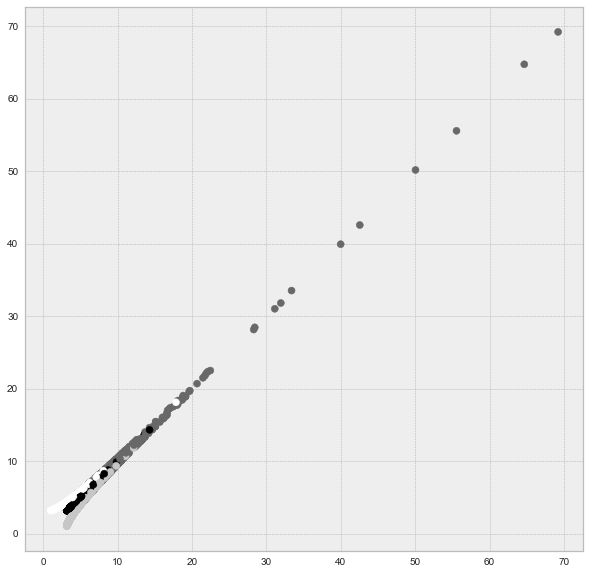

In [118]:
n_clusters = 4
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=600, random_state=0)
proj1 = kmeans.fit_transform(scaled_ds)
cluster = kmeans.predict(scaled_ds)
plt.figure(figsize=(10,10))
plt.scatter(proj1[:,0], proj1[:,1], c=cluster)

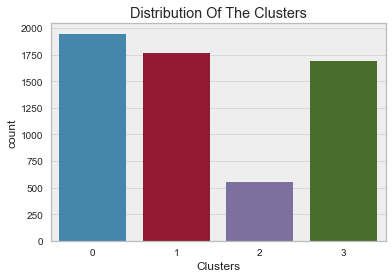

In [119]:
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [120]:
df["Clusters"]

0       2
1       2
2       3
3       1
4       0
       ..
5951    1
5952    0
5953    1
5954    3
5955    3
Name: Clusters, Length: 5956, dtype: int64

In [121]:
df

,client_id,night_count,morning_count,afternoon_count,evening_count,target,Recency,Frequency,Monetary,RFM_Score,...,Cluster_codes_7,Cluster_codes_8,Cluster_codes_9,Cluster_codes_10,Cluster_codes_11,Cluster_codes_12,Cluster_codes_13,Cluster_codes_14,Cluster_codes_15,Clusters
0,70780820,734.0,881.0,1109.0,53.0,1,1,2777,41684196.72,5.00,...,0,0,0,0,0,0,0,2777.0,0,2
1,87252636,33.0,158.0,190.0,116.0,1,6,497,60767294.81,4.88,...,0,0,0,0,1,0,0,496.0,0,2
2,76043922,56.0,177.0,166.0,64.0,0,2,463,4353088.76,4.97,...,2,0,0,0,0,0,0,461.0,0,3
3,29041434,107.0,158.0,164.0,13.0,1,1,442,6150850.22,5.00,...,0,0,0,0,0,0,0,442.0,0,1
4,53854864,31.0,106.0,146.0,97.0,0,3,380,3097812.56,4.94,...,2,0,0,0,1,1,2,363.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5951,27046864,0.0,0.0,0.0,1.0,1,163,1,172935.51,0.17,...,0,0,0,0,0,0,0,1.0,0,1
5952,39357161,0.0,1.0,0.0,0.0,1,196,1,685004.31,0.15,...,0,0,0,0,0,0,0,1.0,0,0
5953,7361878,0.0,0.0,0.0,1.0,1,74,1,31442.82,0.27,...,0,0,0,0,0,0,0,1.0,0,1
5954,89757351,0.0,0.0,0.0,1.0,1,208,1,2245.92,0.14,...,0,0,0,0,0,0,0,1.0,0,3


In [122]:
df3 = pd.get_dummies(df['Clusters'], prefix="Cluster_")

In [123]:
df=df.join(df3)

In [124]:
#df=df.drop(columns=['Clusters'])  

In [125]:
df

,client_id,night_count,morning_count,afternoon_count,evening_count,target,Recency,Frequency,Monetary,RFM_Score,...,Cluster_codes_11,Cluster_codes_12,Cluster_codes_13,Cluster_codes_14,Cluster_codes_15,Clusters,Cluster__0,Cluster__1,Cluster__2,Cluster__3
0,70780820,734.0,881.0,1109.0,53.0,1,1,2777,41684196.72,5.00,...,0,0,0,2777.0,0,2,0,0,1,0
1,87252636,33.0,158.0,190.0,116.0,1,6,497,60767294.81,4.88,...,1,0,0,496.0,0,2,0,0,1,0
2,76043922,56.0,177.0,166.0,64.0,0,2,463,4353088.76,4.97,...,0,0,0,461.0,0,3,0,0,0,1
3,29041434,107.0,158.0,164.0,13.0,1,1,442,6150850.22,5.00,...,0,0,0,442.0,0,1,0,1,0,0
4,53854864,31.0,106.0,146.0,97.0,0,3,380,3097812.56,4.94,...,1,1,2,363.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5951,27046864,0.0,0.0,0.0,1.0,1,163,1,172935.51,0.17,...,0,0,0,1.0,0,1,0,1,0,0
5952,39357161,0.0,1.0,0.0,0.0,1,196,1,685004.31,0.15,...,0,0,0,1.0,0,0,1,0,0,0
5953,7361878,0.0,0.0,0.0,1.0,1,74,1,31442.82,0.27,...,0,0,0,1.0,0,1,0,1,0,0
5954,89757351,0.0,0.0,0.0,1.0,1,208,1,2245.92,0.14,...,0,0,0,1.0,0,3,0,0,0,1


In [126]:
cl1=df[df["Clusters"]==0]
cl2=df[df["Clusters"]==1]
cl3=df[df["Clusters"]==2]
cl4=df[df["Clusters"]==3]

# CL1

In [127]:
cl1

,client_id,night_count,morning_count,afternoon_count,evening_count,target,Recency,Frequency,Monetary,RFM_Score,...,Cluster_codes_11,Cluster_codes_12,Cluster_codes_13,Cluster_codes_14,Cluster_codes_15,Clusters,Cluster__0,Cluster__1,Cluster__2,Cluster__3
4,53854864,31.0,106.0,146.0,97.0,0,3,380,3097812.56,4.94,...,1,1,2,363.0,0,0,1,0,0,0
7,38691781,8.0,83.0,121.0,117.0,0,5,329,4657294.43,4.90,...,0,3,0,315.0,0,0,1,0,0,0
10,54186907,36.0,108.0,93.0,58.0,1,4,295,11759925.88,4.92,...,0,0,0,272.0,0,0,1,0,0,0
16,44632666,3.0,66.0,74.0,63.0,0,3,206,2924269.91,4.94,...,0,1,0,200.0,1,0,1,0,0,0
19,45745541,23.0,83.0,58.0,30.0,0,5,194,2422363.91,4.89,...,0,2,1,177.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5946,57660625,0.0,0.0,1.0,0.0,1,323,1,1122.96,0.12,...,0,0,0,0.0,0,0,1,0,0,0
5948,63387697,0.0,0.0,1.0,0.0,0,172,1,321165.96,0.16,...,0,0,0,1.0,0,0,1,0,0,0
5949,40935946,0.0,0.0,0.0,1.0,0,80,1,40219.41,0.26,...,0,0,0,0.0,0,0,1,0,0,0
5950,55388963,0.0,0.0,1.0,0.0,0,83,1,22459.16,0.25,...,0,0,0,1.0,0,0,1,0,0,0


In [128]:
print('The average spends of cl1:')
print(round(cl1['Monetary'].mean(),2))
print('==================================')
print('The average RFM score of cl1:')
print(round(cl1['RFM_Score'].mean(),2))
print('==================================')
print('The average frequency of cl1:')
print(round(cl1['Frequency'].mean(),2))
print('==================================')
print('The average recency of cl1:')
print(round(cl1['Recency'].mean(),2))
print('==================================')

The average spends of cl1:
627443.89
The average RFM score of cl1:
2.42
The average frequency of cl1:
13.57
The average recency of cl1:
56.91


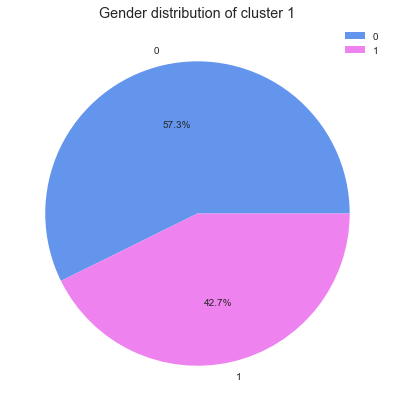

In [129]:
plt.figure(figsize=(7,7))
plt.pie(cl1['target'].value_counts(),labels=cl1['target'].unique(),colors=['cornflowerblue','violet'],autopct='%.1f%%') 
plt.title('Gender distribution of cluster 1')
plt.legend()
plt.show()

# CL2

In [130]:
cl2

,client_id,night_count,morning_count,afternoon_count,evening_count,target,Recency,Frequency,Monetary,RFM_Score,...,Cluster_codes_11,Cluster_codes_12,Cluster_codes_13,Cluster_codes_14,Cluster_codes_15,Clusters,Cluster__0,Cluster__1,Cluster__2,Cluster__3
3,29041434,107.0,158.0,164.0,13.0,1,1,442,6150850.22,5.00,...,0,0,0,442.0,0,1,0,1,0,0
5,29894123,8.0,107.0,130.0,119.0,0,2,364,1080230.92,4.97,...,0,0,1,351.0,0,1,0,1,0,0
9,19805868,3.0,89.0,135.0,84.0,1,2,311,8525298.21,4.97,...,0,1,1,302.0,0,1,0,1,0,0
17,450407,5.0,51.0,57.0,92.0,0,1,205,2624731.49,4.99,...,1,0,0,201.0,0,1,0,1,0,0
18,13182172,5.0,64.0,68.0,58.0,0,1,195,1606912.77,4.99,...,0,0,0,184.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5939,23414531,0.0,0.0,1.0,0.0,1,1,1,11229.58,0.85,...,0,0,0,1.0,0,1,0,1,0,0
5940,26972587,0.0,0.0,1.0,0.0,0,204,1,44918.32,0.14,...,0,0,0,1.0,0,1,0,1,0,0
5942,12289409,0.0,1.0,0.0,0.0,0,349,1,132509.03,0.11,...,0,0,0,1.0,0,1,0,1,0,0
5951,27046864,0.0,0.0,0.0,1.0,1,163,1,172935.51,0.17,...,0,0,0,1.0,0,1,0,1,0,0


In [131]:
print('The average spends of cl2:')
print(round(cl2['Monetary'].mean(),2))
print('==================================')
print('The average RFM score of cl2:')
print(round(cl2['RFM_Score'].mean(),2))
print('==================================')
print('The average frequency of cl2:')
print(round(cl2['Frequency'].mean(),2))
print('==================================')
print('The average recency of cl2:')
print(round(cl2['Recency'].mean(),2))
print('==================================')

The average spends of cl2:
622242.48
The average RFM score of cl2:
2.35
The average frequency of cl2:
12.79
The average recency of cl2:
55.38


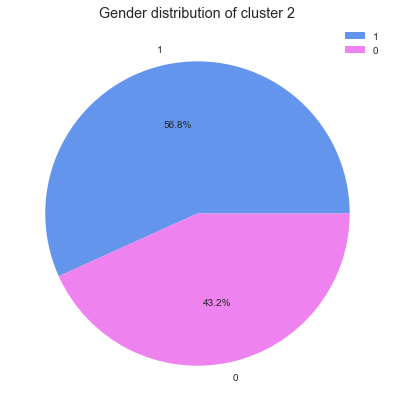

In [132]:
plt.figure(figsize=(7,7))
plt.pie(cl2['target'].value_counts(),labels=cl2['target'].unique(),colors=['cornflowerblue','violet'],autopct='%.1f%%') 
#autopct to show distribution percents
plt.title('Gender distribution of cluster 2')
plt.legend()
plt.show()

# CL3

In [133]:
cl3

,client_id,night_count,morning_count,afternoon_count,evening_count,target,Recency,Frequency,Monetary,RFM_Score,...,Cluster_codes_11,Cluster_codes_12,Cluster_codes_13,Cluster_codes_14,Cluster_codes_15,Clusters,Cluster__0,Cluster__1,Cluster__2,Cluster__3
0,70780820,734.0,881.0,1109.0,53.0,1,1,2777,41684196.72,5.00,...,0,0,0,2777.0,0,2,0,0,1,0
1,87252636,33.0,158.0,190.0,116.0,1,6,497,60767294.81,4.88,...,1,0,0,496.0,0,2,0,0,1,0
8,73534440,13.0,129.0,114.0,70.0,0,2,326,3640065.55,4.97,...,0,0,1,315.0,0,2,0,0,1,0
11,82235884,3.0,90.0,75.0,74.0,0,5,242,1880885.75,4.90,...,0,1,3,226.0,0,2,0,0,1,0
13,70665012,24.0,61.0,98.0,36.0,1,1,219,4200722.31,4.99,...,1,1,0,179.0,1,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,71418107,0.0,5.0,7.0,4.0,0,10,16,366879.78,3.42,...,0,1,1,4.0,0,2,0,0,1,0
2092,70466873,0.0,3.0,9.0,3.0,1,28,15,241139.05,3.10,...,0,0,0,1.0,0,2,0,0,1,0
2151,97938106,5.0,7.0,2.0,1.0,1,1,15,317516.57,3.49,...,0,2,0,3.0,4,2,0,0,1,0
2514,95136516,1.0,1.0,6.0,5.0,0,7,13,1638846.97,3.10,...,0,0,0,1.0,0,2,0,0,1,0


In [134]:
print('The average spends of cl3:')
print(round(cl3['Monetary'].mean(),2))
print('==================================')
print('The average RFM score of cl3:')
print(round(cl3['RFM_Score'].mean(),2))
print('==================================')
print('The average frequency of cl3:')
print(round(cl3['Frequency'].mean(),2))
print('==================================')
print('The average recency of cl3:')
print(round(cl3['Recency'].mean(),2))
print('==================================')

The average spends of cl3:
2245999.5
The average RFM score of cl3:
4.41
The average frequency of cl3:
42.91
The average recency of cl3:
15.35


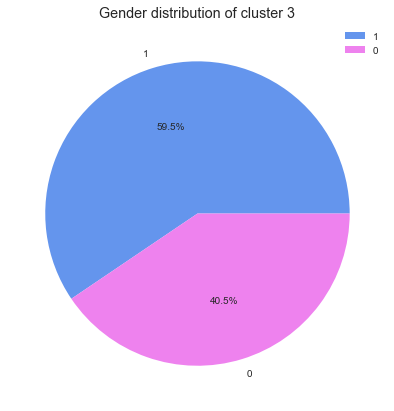

In [135]:
plt.figure(figsize=(7,7))
plt.pie(cl3['target'].value_counts(),labels=cl2['target'].unique(),colors=['cornflowerblue','violet'],autopct='%.1f%%') 
#autopct to show distribution percents
plt.title('Gender distribution of cluster 3')
plt.legend()
plt.show()

# CL4

In [136]:
cl4

,client_id,night_count,morning_count,afternoon_count,evening_count,target,Recency,Frequency,Monetary,RFM_Score,...,Cluster_codes_11,Cluster_codes_12,Cluster_codes_13,Cluster_codes_14,Cluster_codes_15,Clusters,Cluster__0,Cluster__1,Cluster__2,Cluster__3
2,76043922,56.0,177.0,166.0,64.0,0,2,463,4353088.76,4.97,...,0,0,0,461.0,0,3,0,0,0,1
6,85861930,9.0,100.0,102.0,124.0,0,1,335,4809415.49,5.00,...,0,1,0,329.0,0,3,0,0,0,1
12,84826852,22.0,44.0,80.0,92.0,1,3,238,3710023.76,4.94,...,0,0,0,228.0,0,3,0,0,0,1
14,84712006,2.0,57.0,75.0,82.0,0,2,216,947417.11,4.96,...,0,0,0,212.0,0,3,0,0,0,1
15,87084168,44.0,80.0,87.0,4.0,1,3,215,2174046.47,4.94,...,0,0,0,213.0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,83073247,0.0,0.0,1.0,0.0,1,65,1,22459.16,0.30,...,0,0,0,1.0,0,3,0,0,0,1
5937,86806590,0.0,0.0,1.0,0.0,1,338,1,11229.58,0.11,...,0,0,0,1.0,0,3,0,0,0,1
5947,98415152,0.0,1.0,0.0,0.0,0,47,1,67377.47,0.36,...,0,0,0,1.0,0,3,0,0,0,1
5954,89757351,0.0,0.0,0.0,1.0,1,208,1,2245.92,0.14,...,0,0,0,1.0,0,3,0,0,0,1


In [137]:
print('The average spends of cl4:')
print(round(cl4['Monetary'].mean(),2))
print('==================================')
print('The average RFM score of cl4:')
print(round(cl4['RFM_Score'].mean(),2))
print('==================================')
print('The average frequency of cl4:')
print(round(cl4['Frequency'].mean(),2))
print('==================================')
print('The average recency of cl4:')
print(round(cl4['Recency'].mean(),2))
print('==================================')

The average spends of cl4:
556497.64
The average RFM score of cl4:
2.15
The average frequency of cl4:
11.23
The average recency of cl4:
62.09


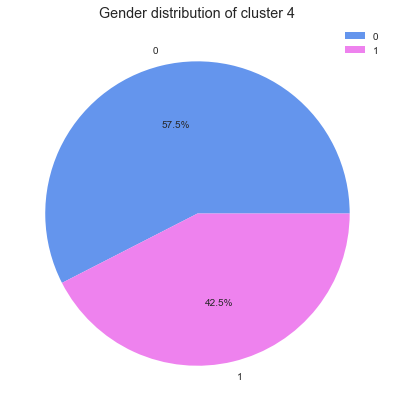

In [138]:
plt.figure(figsize=(7,7))
plt.pie(cl4['target'].value_counts(),labels=cl4['target'].unique(),colors=['cornflowerblue','violet'],autopct='%.1f%%') 
#autopct to show distribution percents
plt.title('Gender distribution of cluster 4')
plt.legend()
plt.show()

# Profiling the clusters

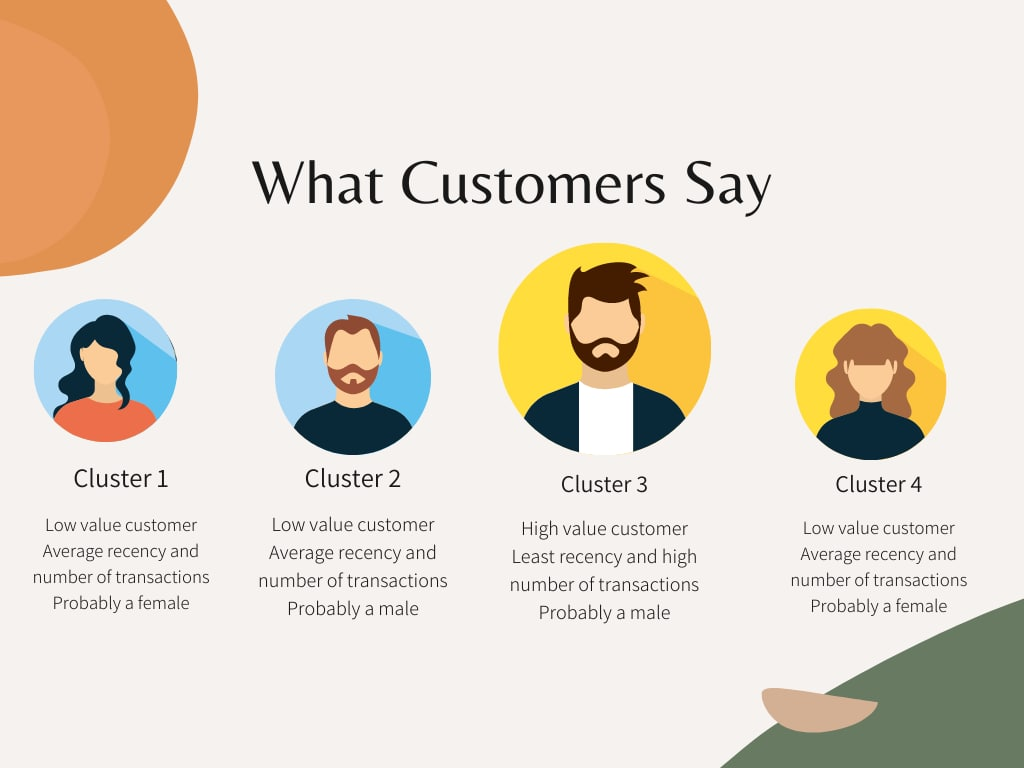

In [139]:
from IPython import display
display.Image("cluster_ph.jpg")